# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [4]:
dataset = pd.read_csv('Crop1.csv')
dataset

,N,P,K,temperature,humidity,ph,rainfall,Croptype
0,76,47,42,20.083696,83.291147,5.739175,263.637218,rice
1,25,64,20,33.151226,32.459745,4.807777,105.038027,pigeonpeas
2,39,129,203,34.389225,83.183928,5.863997,71.030016,grapes
3,30,60,21,28.876676,62.490121,5.457871,182.268818,pigeonpeas
4,81,56,36,23.396057,72.605129,7.097586,174.787641,jute
...,...,...,...,...,...,...,...,...
2195,129,43,16,25.550370,77.850556,6.732109,78.584885,cotton
2196,39,37,15,28.997315,83.789115,6.821747,59.844992,mungbean
2197,14,57,15,29.875702,83.147963,6.623438,40.120442,mungbean
2198,69,55,38,22.708838,82.639414,5.700806,271.324860,rice


# Exploring the Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   Croptype     2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Null value checking

In [6]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Croptype       0
dtype: int64

# Duplicate values checking

In [7]:
dataset.duplicated().sum()

0

# Splitting the dataset into input and output values

In [8]:
X = dataset.iloc[:, 0:7]
y = dataset.iloc[:, 7]
print("Input Data: ")
print(pd.DataFrame(X))
print("Output Data: ")
print(pd.DataFrame(y))

Input Data: 
        N    P    K  temperature   humidity        ph    rainfall
0      76   47   42    20.083696  83.291147  5.739175  263.637218
1      25   64   20    33.151226  32.459745  4.807777  105.038027
2      39  129  203    34.389225  83.183928  5.863997   71.030016
3      30   60   21    28.876676  62.490121  5.457871  182.268818
4      81   56   36    23.396057  72.605129  7.097586  174.787641
...   ...  ...  ...          ...        ...       ...         ...
2195  129   43   16    25.550370  77.850556  6.732109   78.584885
2196   39   37   15    28.997315  83.789115  6.821747   59.844992
2197   14   57   15    29.875702  83.147963  6.623438   40.120442
2198   69   55   38    22.708838  82.639414  5.700806  271.324860
2199   30   63   16    23.605066  21.905396  5.525905  100.597873

[2200 rows x 7 columns]
Output Data: 
         Croptype
0            rice
1      pigeonpeas
2          grapes
3      pigeonpeas
4            jute
...           ...
2195       cotton
2196     mun

#Visualization the dataset for Ph Vs Crop type

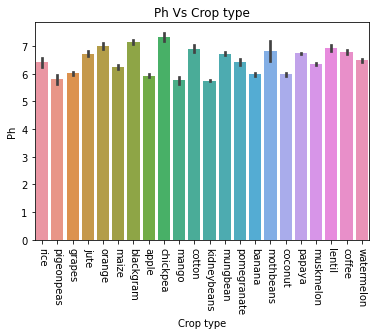

In [9]:
sns.barplot(x='Croptype',y='ph',data=dataset)
plt.xticks(rotation=270)
plt.title("Ph Vs Crop type")
plt.xlabel("Crop type")
plt.ylabel("Ph")
plt.show()

#Visualization the dataset for Humidity Vs Crop type

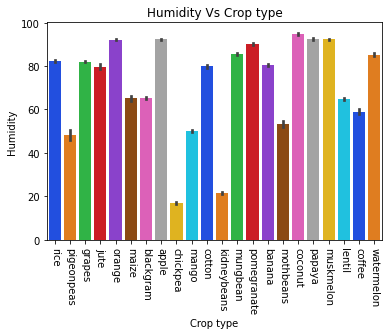

In [10]:
sns.barplot(x='Croptype',y='humidity',data=dataset,palette='bright')
plt.xticks(rotation=270)
plt.title("Humidity Vs Crop type")
plt.xlabel("Crop type")
plt.ylabel("Humidity")
plt.show()

#Visualization the dataset for Temperature Vs Crop type

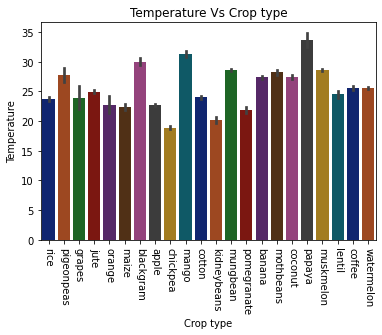

In [11]:
sns.barplot(x='Croptype',y='temperature',data=dataset,palette='dark')
plt.xticks(rotation=270)
plt.title("Temperature Vs Crop type")
plt.xlabel("Crop type")
plt.ylabel("Temperature")
plt.show()

#Visualization the dataset for Rainfall Vs Crop type

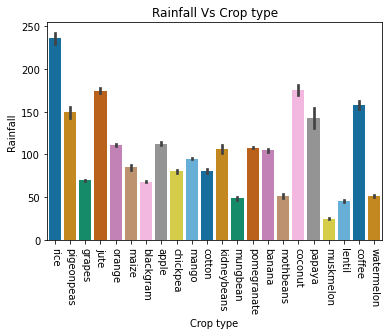

In [12]:
sns.barplot(x='Croptype',y='rainfall',data=dataset,palette='colorblind')
plt.xticks(rotation=270)
plt.title("Rainfall Vs Crop type")
plt.xlabel("Crop type")
plt.ylabel("Rainfall")
plt.show()

#Visualization the dataset for Potassium Vs Crop type

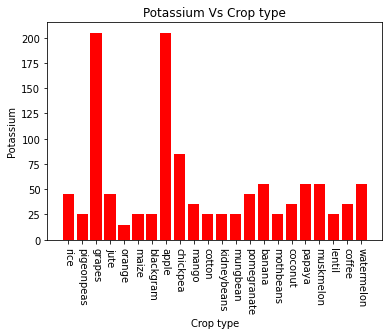

In [13]:
K1 = X.iloc[:,2]
plt.bar(y,K1,color="Red")
plt.xticks(rotation=270)
plt.title("Potassium Vs Crop type")
plt.xlabel("Crop type")
plt.ylabel("Potassium")
plt.show()

#Visualization the dataset for Nitrogen Vs Crop type

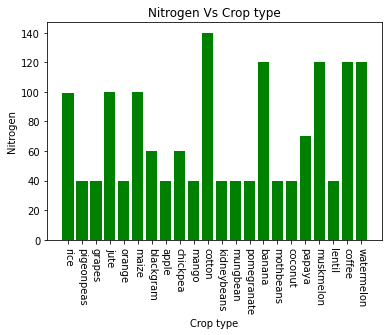

In [14]:
N1 = X.iloc[:,0]
plt.bar(y,N1,color="Green")
plt.xticks(rotation=270)
plt.title("Nitrogen Vs Crop type")
plt.xlabel("Crop type")
plt.ylabel("Nitrogen")
plt.show()

#Visualization the dataset for Phosphorus Vs Crop type

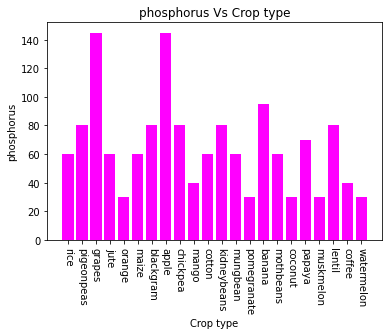

In [15]:
P1 = X.iloc[:,1]
plt.bar(y,P1,color="Magenta")
plt.xticks(rotation=270)
plt.title("phosphorus Vs Crop type")
plt.xlabel("Crop type")
plt.ylabel("phosphorus")
plt.show()

# Encoding the data (Lebel Encoding)

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y1 = labelencoder.fit_transform(y)
#Crop_encoding = {i : label for i, label in enumerate(labelencoder.classes_)}
#Crop_encoding

In [17]:
crop_encoded_value = pd.DataFrame(y1)
crop_encoded_value.columns=['Croptype']
frame = [X,crop_encoded_value]
df = pd.concat(frame, axis=1, join='inner')

# Correlation Matrix for Visualization the Dataset

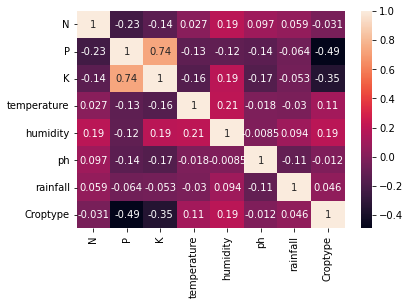

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Visualization the data for balancing

In [19]:
unique_y = np.unique(y,return_counts=True)
V = np.array(unique_y).T
Values = pd.DataFrame(V)
Values

,0,1
0,apple,100
1,banana,100
2,blackgram,100
3,chickpea,100
4,coconut,100
5,coffee,100
6,cotton,100
7,grapes,100
8,jute,100
9,kidneybeans,100


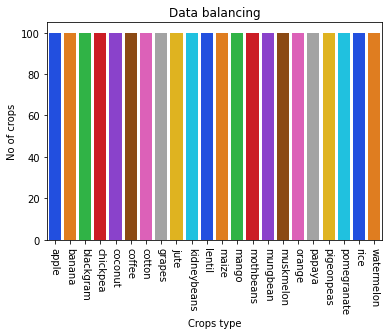

In [20]:
C = Values.iloc[:,0]
V = Values.iloc[:,1]

sns.barplot(x=C,y=V,data=dataset,palette='bright')
plt.title("Data balancing")
plt.xlabel("Crops type")
plt.ylabel("No of crops")
plt.xticks(rotation=270)
plt.show()

In [21]:
'''from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = .2, random_state = 42)
#X1_train = pd.DataFrame(X1_train)
X1_test = pd.DataFrame(X1_test)
#y1_train = pd.DataFrame(y1_train)
#y1_test = pd.DataFrame(y1_test)'''

'from sklearn.model_selection import train_test_split\nX1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = .2, random_state = 42)\n#X1_train = pd.DataFrame(X1_train)\nX1_test = pd.DataFrame(X1_test)\n#y1_train = pd.DataFrame(y1_train)\n#y1_test = pd.DataFrame(y1_test)'

# Spliting the dataset into Train and Test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = .2, random_state = 42)
#print(y_test.max())

# Train the model using Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predict the Output Value by using Decision Tree

In [24]:
Y_pred = decisiontree.predict(X_test)
'''n = pd.DataFrame(Y_pred)
crop_pred_num = n.iloc[:,0].values
max(Y_pred)
n.max()'''

'n = pd.DataFrame(Y_pred)\ncrop_pred_num = n.iloc[:,0].values\nmax(Y_pred)\nn.max()'

In [25]:
accu = []
model = []

# Accuracy Calculation of Decision Tree

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, Y_pred)*100
accu = [accuracy]
model = ["Dicision Tree"]
print("Accuracy of Decision Tree is :",accuracy)

Accuracy of Decision Tree is : 98.86363636363636


#Data decoding for Output

In [27]:
'''dis = {	
0:	'apple',
1:	'banana',
2:	'blackgram',
3:	'chickpea',
4:	'coconut',
5:	'coffee',
6:	'cotton',
7:	'grapes',
8:	'jute',
9:	'kidneybeans',
10:	'lentil',
11:	'maize',
12:	'mango',
13:	'mothbeans',
14:	'mungbean',
15:	'muskmelon',
16:	'orange',
17:	'papaya',
18:	'pigeonpeas',
19:	'pomegranate',
20:	'rice',
21:	'watermelon'
}

n[0] = n[0].map(dis)
C_pred_str = n.iloc[:,0]
C_pred_str'''

"dis = {\t\n0:\t'apple',\n1:\t'banana',\n2:\t'blackgram',\n3:\t'chickpea',\n4:\t'coconut',\n5:\t'coffee',\n6:\t'cotton',\n7:\t'grapes',\n8:\t'jute',\n9:\t'kidneybeans',\n10:\t'lentil',\n11:\t'maize',\n12:\t'mango',\n13:\t'mothbeans',\n14:\t'mungbean',\n15:\t'muskmelon',\n16:\t'orange',\n17:\t'papaya',\n18:\t'pigeonpeas',\n19:\t'pomegranate',\n20:\t'rice',\n21:\t'watermelon'\n}\n\nn[0] = n[0].map(dis)\nC_pred_str = n.iloc[:,0]\nC_pred_str"

# Data Visualization: Actual Value Vs Predicted Value (Decision Tree)

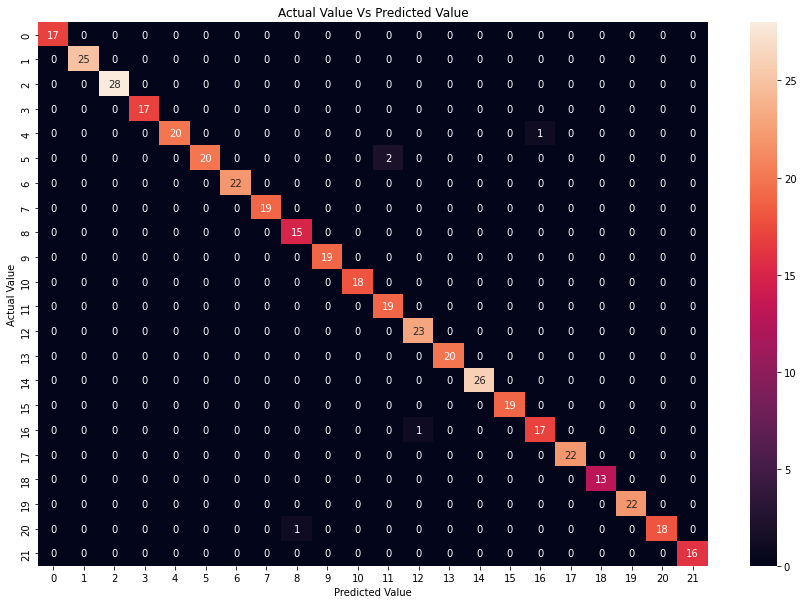

In [28]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(15,10))
con_mat = confusion_matrix(y_test,Y_pred)
sns.heatmap(con_mat,annot=True,ax=ax)
#plt.bar(y1_test,ph,color="Orange")
#plt.bar(C_pred_str,ph,color="Green",alpha=0.7)
#plt.xticks(rotation=270)
plt.title("Actual Value Vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# Train the model using Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict the Output Value

In [30]:
y_pred=randomforest.predict(X_test)

# Accuracy Calculation of Random Forest

In [31]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred)*100
accu.append(accuracy1)
model.append("Random Forest")
print("Accuracy of Random Forest is :",accuracy1)

Accuracy of Random Forest is : 99.77272727272727


# Data Visualization: Actual Value Vs Predicted Value (Random Forest)

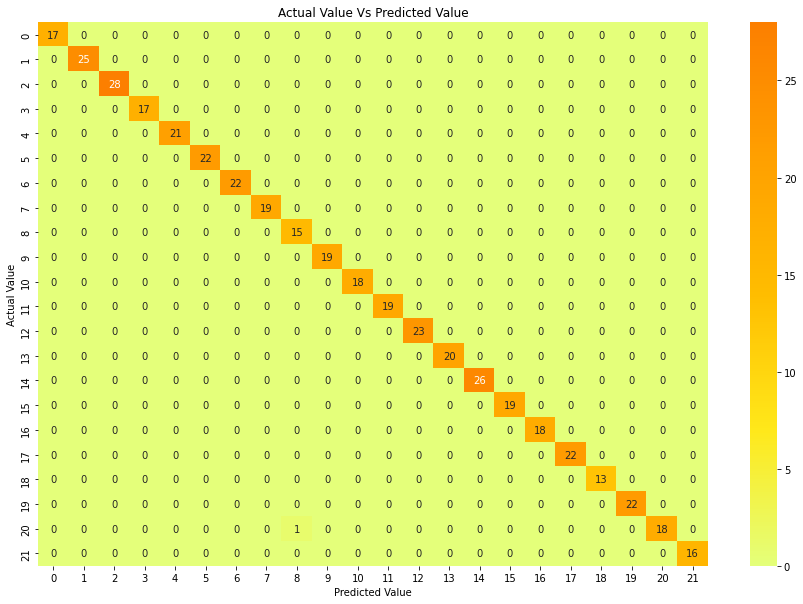

In [32]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(15,10))
cn_mt = confusion_matrix(y_test,y_pred)
sns.heatmap(cn_mt,annot=True,ax=ax,cmap="Wistia")
plt.title("Actual Value Vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# Train the model using K Nearest Neighbor Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Predict the Output Value

In [34]:
pred_values = knn.predict(X_test)

# Accuracy calculation of K Nearest Neighbor

In [35]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, pred_values)*100
accu.append(accuracy2)
model.append("K Nearest Neighbor")
print("Accuracy of K Nearest Neighbor is :",accuracy2)

Accuracy of K Nearest Neighbor is : 97.95454545454545


# Data Visualization: Actual Value Vs Predicted Value (K Nearest Neighbor)

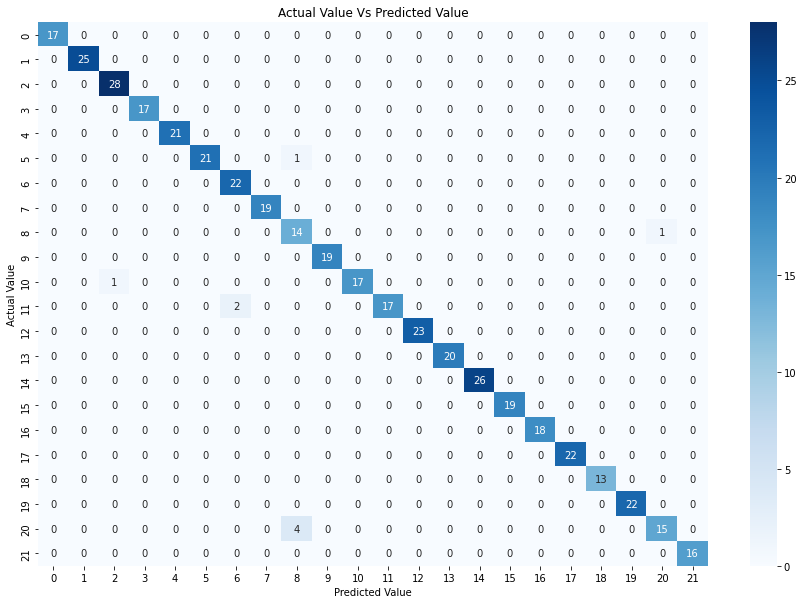

In [36]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(15,10))
cn_mt = confusion_matrix(y_test, pred_values)
sns.heatmap(cn_mt,annot=True,ax=ax,cmap="Blues")
plt.title("Actual Value Vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# Hyperparameter Tuning for K Nearest Neighbor

In [37]:
mean_accu = []
for i in range(1,51):  
    knn1 = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    pred_values1= knn1.predict(X_test)
    mean_accu.append(accuracy_score(y_test, pred_values1))
#mean_accu

# Visualizatoin the Accuracy wrt Number of Neighbors

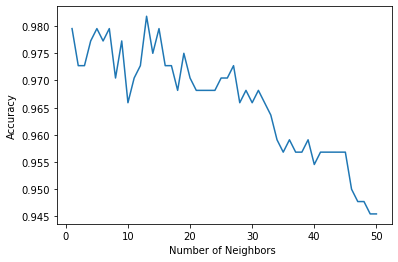

In [38]:
#plt.figure(figsize = (20,15))
#plt.xticks([int(i) for i in range(1,51)])
plt.plot(range(1,51), mean_accu)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

# Finding the optimum parameter

In [61]:
parameter = { 'n_neighbors' : [int(i) for i in range(1,21)],
               'weights' : ['uniform','distance']}

In [40]:
from sklearn.model_selection import GridSearchCV
gridsearchcv = GridSearchCV(KNeighborsClassifier(), parameter, n_jobs = -1)

# Train the dataset by GridSearchCV

In [58]:
grid_fit = gridsearchcv.fit(X_train, y_train)

In [59]:
grid_fit.best_score_

0.9789772727272726

In [60]:
grid_fit.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

# Fit the data in KNeighborClasifier by the tuned parameter

In [56]:
knn2 = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

# Predict the value by tuned parameter

In [54]:
y_pred_values = knn2.predict(X_test)

# Accuracy calculation by tuned parameter

In [55]:
from sklearn.metrics import accuracy_score
Acc = accuracy_score(y_test, y_pred_values)*100
print("Accuracy of K Nearest Neighbor by tuned parameter is :",Acc)

Accuracy of K Nearest Neighbor by tuned parameter is : 98.18181818181819


# Train the model by Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
model2= LogisticRegression(random_state = 0)
model2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

# Predict the output by Logictic Regression

In [48]:
Y_pred1 = model2.predict(X_test)

# Accuracy Calculation of Logictic Regression

In [49]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,Y_pred1)*100
accu.append(score)
model.append("Logistic Regression")
print("Accuracy of Logictic Regression :",score)

Accuracy of Logictic Regression : 94.54545454545455


# Data Visualization: Actual Value Vs Predicted Value (Logictic Regression)

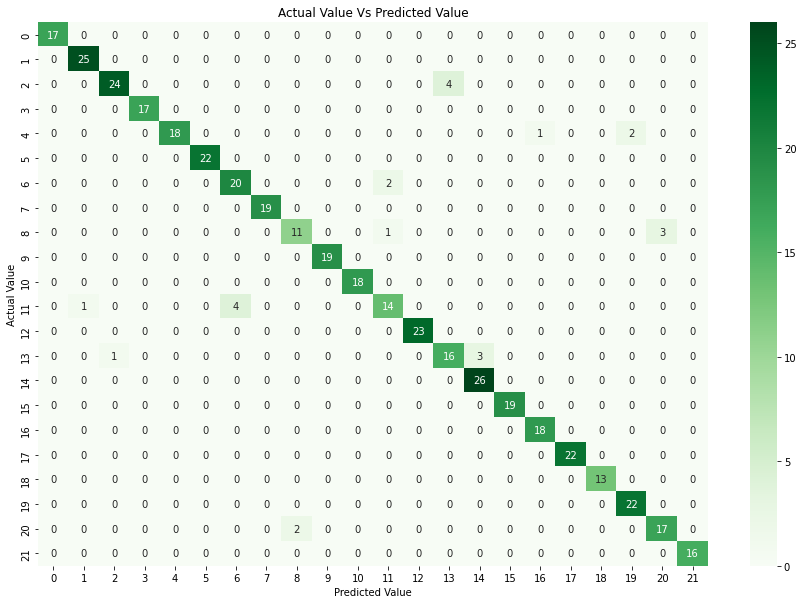

In [50]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(15,10))
cn_mt = confusion_matrix(y_test, Y_pred1)
sns.heatmap(cn_mt,annot=True,ax=ax,cmap="Greens")
plt.title("Actual Value Vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# Accuracy Comparison

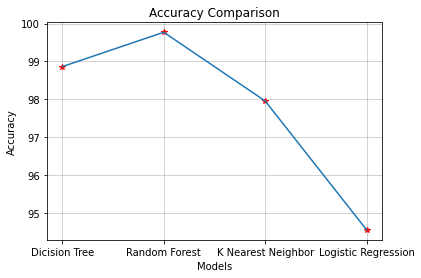

In [51]:
#scale = np.arange(0.95,1.0)
#sns.histplot(x = model,hue = accu,shrink=1,palette=['r','g'],log_scale=True)
plt.plot(model,accu,'r*')
plt.plot(model,accu)
plt.grid(alpha=0.7)
plt.title("Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# Prediction of Crop by user input

In [52]:
'''a=float(input('Enter the Nitrogen value in soil: '))
b=float(input('Enter the Phosphorus value in soil: '))
c=float(input('Enter the Potassium value in soil: '))
d=float(input('Enter the Temperature: '))
e=float(input('Enter the Humidity: '))
f=float(input('Enter the ph level of the soil: ')) 
g=float(input('Enter the rainfall: '))

P = int(randomforest.predict([[a,b,c,d,e,f,g]]))
print(P)
if P==0:
  print("Predicted crop is: apple")
elif P==1:
  print("Predicted crop is: banana")
elif P==2:
  print("Predicted crop is: blackgram")
elif P==3:
  print("Predicted crop is: chickpea")
elif P==4:
  print("Predicted crop is: coconut")
elif P==5:
  print("Predicted crop is: coffee")
elif P==6:
  print("Predicted crop is: cotton")
elif P==7:
  print("Predicted crop is: grapes")
elif P==8:
  print("Predicted crop is: jute")
elif P==9:
  print("Predicted crop is: kidneybeans")
elif P==10:
  print("Predicted crop is: lentil")
elif P==11:
  print("Predicted crop is: maize")
elif P==12:
  print("Predicted crop is: mango")
elif P==13:
  print("Predicted crop is: mothbeans")
elif P==14:
  print("Predicted crop is: mungbean")
elif P==15:
  print("Predicted crop is: muskmelon")
elif P==16:
  print("Predicted crop is: orange")
elif P==17:
  print("Predicted crop is: papaya")
elif P==18:
  print("Predicted crop is: pigeonpeas")
elif P==19:
  print("Predicted crop is: pomegranate")
elif P==20:
  print("Predicted crop is: rice")
elif P==21:
  print("Predicted crop is: watermelon")'''

'a=float(input(\'Enter the Nitrogen value in soil: \'))\nb=float(input(\'Enter the Phosphorus value in soil: \'))\nc=float(input(\'Enter the Potassium value in soil: \'))\nd=float(input(\'Enter the Temperature: \'))\ne=float(input(\'Enter the Humidity: \'))\nf=float(input(\'Enter the ph level of the soil: \')) \ng=float(input(\'Enter the rainfall: \'))\n\nP = int(randomforest.predict([[a,b,c,d,e,f,g]]))\nprint(P)\nif P==0:\n  print("Predicted crop is: apple")\nelif P==1:\n  print("Predicted crop is: banana")\nelif P==2:\n  print("Predicted crop is: blackgram")\nelif P==3:\n  print("Predicted crop is: chickpea")\nelif P==4:\n  print("Predicted crop is: coconut")\nelif P==5:\n  print("Predicted crop is: coffee")\nelif P==6:\n  print("Predicted crop is: cotton")\nelif P==7:\n  print("Predicted crop is: grapes")\nelif P==8:\n  print("Predicted crop is: jute")\nelif P==9:\n  print("Predicted crop is: kidneybeans")\nelif P==10:\n  print("Predicted crop is: lentil")\nelif P==11:\n  print("Pre